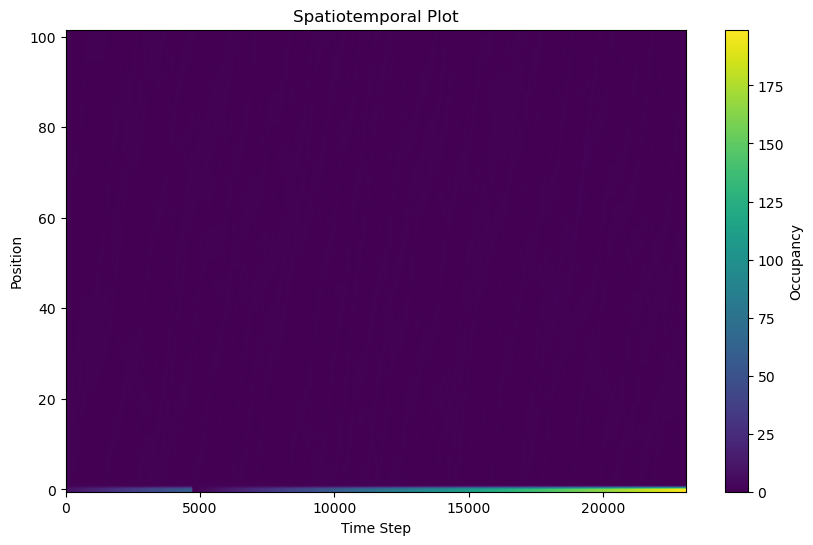

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

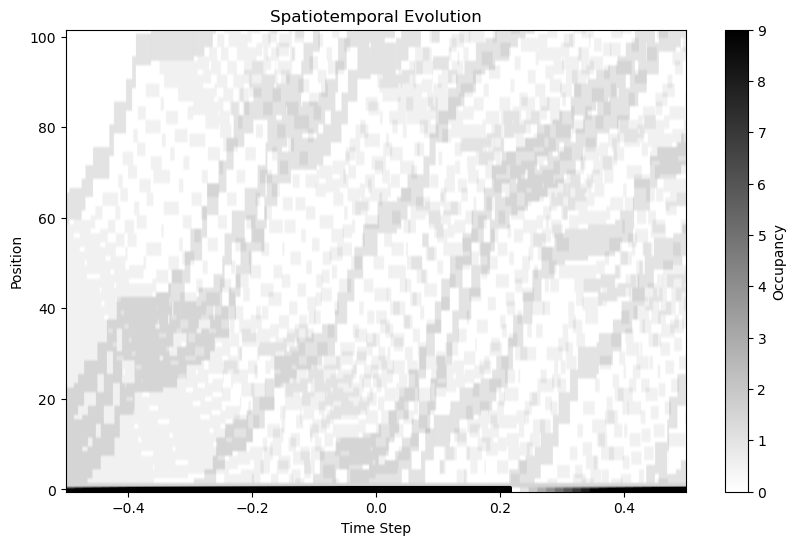

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load data
filename = "Trial1Feb28(density = 0.4).csv"  # Change this to your actual file

data = pd.read_csv(filename)
data = data.to_numpy()

# Extract dimensions
time_steps, positions = data.shape

# Create static plot
plt.figure(figsize=(10, 6))
plt.imshow(data.T, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Occupancy')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Spatiotemporal Plot')
plt.savefig("spatiotemporal_plot.png", dpi=300)
plt.show()

# Create animation
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.imshow(data.T[:, :1], aspect='auto', cmap='binary', origin='lower')
plt.colorbar(cax, label='Occupancy')
ax.set_xlabel("Time Step")
ax.set_ylabel("Position")
ax.set_title("Spatiotemporal Evolution")

def update(frame):
    cax.set_array(data.T[:, :frame+1])
    return [cax]

ani = animation.FuncAnimation(fig, update, frames=time_steps, interval=50, blit=False)
ani.save("spatiotemporal_animation.mp4", writer="ffmpeg", fps=30)

plt.show()